In [1]:
#2) The insurance company benchmark data set gives information on customers. Specifically, it contains 86 variables on product-usage data and socio-demographic data derived from zip area codes. There are 5,822 customers in the training set and another 4,000 in the test set. The data were collected to answer the following questions: Can you predict who will be interested in buying a caravan insurance policy and give an explanation why? Compute the OLS estimates and compare them with those obtained from the following variable-selection algorithms: Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression. What methods performed the best in the prediction?
rm(list = ls())

In [2]:
install.packages('leaps')
library(leaps)


The downloaded binary packages are in
	/var/folders/_3/nbf8r53d0f19nygyl0lz56p40000gn/T//RtmpuzWJxB/downloaded_packages


In [3]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



In [13]:
install.packages("caret")


The downloaded binary packages are in
	/var/folders/_3/nbf8r53d0f19nygyl0lz56p40000gn/T//RtmpuzWJxB/downloaded_packages


In [15]:
library(caret)

In [16]:
training_set  <- data.frame(read.table('ticdata2000.txt')) #Training data 
x_testing_set <- data.frame(read.table('ticeval2000.txt')) #Testing data
y_testing_set <- data.frame(read.table('tictgts2000.txt')) #For Evalutaion
# str(training_set)

In [17]:
x_training_set = training_set[, -86] 
y_training_set = training_set[, "V86"] 

In [18]:
dim(training_set)
dim(x_testing_set)
dim(x_training_set)

[1] 5822   86

[1] 4000   85

[1] 5822   85

In [19]:
# checking if there are missing values (NAs)
colSums(is.na(training_set))
colSums(is.na(x_testing_set))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 V86 
  0   0   0   0   0   0

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 
  0   0   0   0   0

From the description of the dataset it is given that, attribute 86, "CARAVAN:Number of mobile home policies", is the target variable. i.e V86 is the target variable

In [20]:
table(training_set$V86)


   0    1 
5474  348 

In [21]:
linear_fit <- lm(V86 ~ ., data = training_set)
summary(linear_fit)


Call:
lm(formula = V86 ~ ., data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
V1           0.0035209  0.0022512   1.564 0.117866    
V2          -0.0072642  0.0076739  -0.947 0.343875    
V3          -0.0012739  0.0071737  -0.178 0.859055    
V4           0.0107473  0.0049596   2.167 0.030279 *  
V5          -0.0154869  0.0101044  -1.533 0.125405    
V6          -0.0056016  0.0056016  -1.000 0.317353    
V7          -0.0002069  0.0060664  -0.034 0.972795    
V8           0.0003569  0.0054592   0.065 0.947874    
V9          -0.0030237  0.0058038  -0.521 0.602399    
V10          0.0086829  0.0075479   1.150 0.250036    
V11          0.0020367  0.0072008   0.283 0.777310    
V12          0.0055682  0.0076295   0.730 0.465526    
V13         -0.0038250  0.0065474  -0.584 0.559107    
V14   

In [22]:
#predictiing training and testing samples

linear_train_pred = predict(linear_fit, x_training_set)
linear_test_pred  = predict(linear_fit, x_testing_set)
head(linear_train_pred)
head(linear_test_pred)

1          2          3          4          5          6 
0.09738541 0.01345938 0.08354523 0.09075754 0.04307400 0.01475749

1           2           3           4           5           6 
0.014441132 0.215946829 0.099937482 0.095439888 0.005945841 0.027520016

In [23]:
#since we are classifying lets convert values above 0.5 to 1 and below or equal to 0.5 to 0

linear_train_pred = ifelse(linear_train_pred > 0.5, 1, 0)
linear_test_pred  = ifelse(linear_test_pred > 0.5, 1, 0)

In [24]:
#calculating training and testing error

train_error <- postResample(linear_train_pred, training_set[, 86])
test_error  <- postResample(linear_test_pred, y_testing_set[, 1])
train_error
test_error

RMSE    Rsquared         MAE 
0.244134208 0.003378766 0.059601512

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

In [25]:
#combining testing data

names(y_testing_set) <- "V86"
testing_set <- cbind(x_testing_set, y_testing_set)
head(testing_set)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,1,0,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,0,0,0,1,0,0,0,0,0,1
3,39,1,3,3,9,1,4,2,3,5,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,1,0,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,2,0,0,0,0,0,0


In [27]:
#Forward Selection
regfit_forward  <- regsubsets(V86~., nbest = 1, data = training_set, method = "forward",  nvmax = 85)

In [28]:
forward_summary <- summary(regfit_forward)

In [29]:
names(forward_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

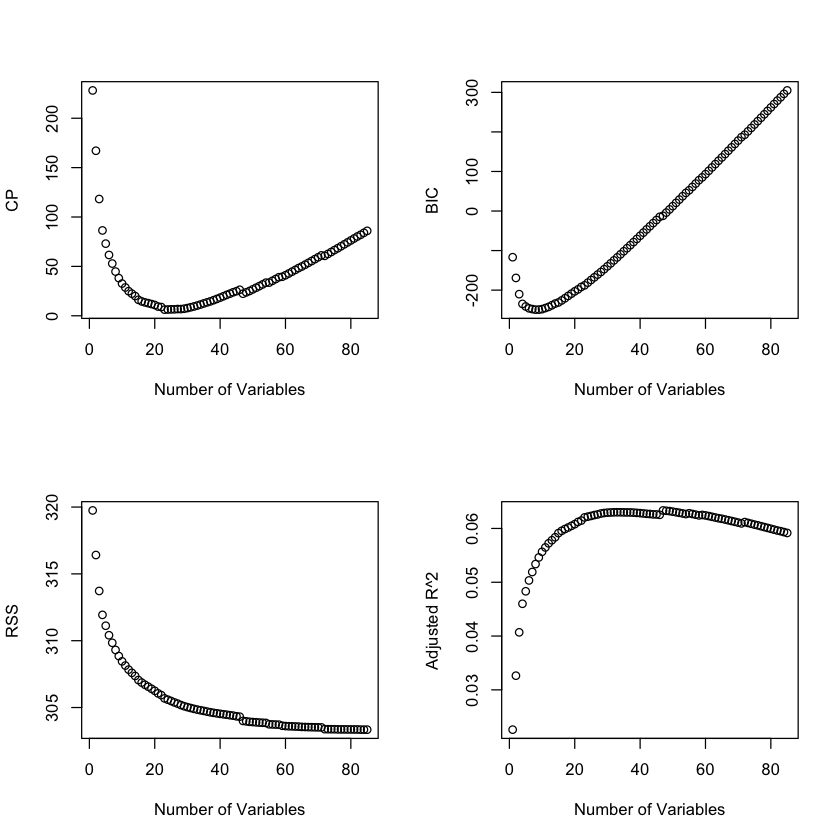

In [30]:
# plotting model selection measures of forward selection

par(mfrow = c(2,2))
plot(forward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(forward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(forward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(forward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Squared

In [31]:
# Examining the best 'p' variable models using forward selection 

forward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
10 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*


In [32]:
#Identifying the optimal models using model selection measures

print("Calculating the number of variables of best performing subset according to certain model selection measures")
which(forward_summary$cp == min(forward_summary$cp))
which(forward_summary$bic == min(forward_summary$bic)) 
which(forward_summary$rss == min(forward_summary$rss)) 
which(forward_summary$adjr2 == max(forward_summary$adjr2)) 

[1] "Calculating the number of variables of best performing subset according to certain model selection measures"


[1] 23

[1] 8

[1] 85

[1] 47

In [33]:
#best 23 variable subset (selected via forward selection)
forward_summary$outmat[23, ] 

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
" " " " " " "*" " " " " "*" " " " " "*" " " " " " " " " " " "*" " " "*" " " " " 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
"*" " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" " " " " " " " " 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
"*" "*" "*" "*" " " "*" "*" " " " " " " " " " " " " " " " " " " "*" "*" "*" " " 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" "*" 
V81 V82 V83 V84 V85 
" " "*" "*" " " "*"

In [34]:
#OLS estimates for the best 23 variable subset (selected via forward selection)
coef(regfit_forward, 23)

(Intercept)           V4           V7          V10          V16          V18 
 0.601138905  0.009609302  0.003566035  0.005089834  0.004894039 -0.005563832 
         V21          V35          V36          V41          V42          V43 
-0.008559661 -0.074829917 -0.078182642 -0.014089962  0.006175123  0.003178080 
         V44          V46          V47          V57          V58          V59 
 0.010328150 -0.016014259  0.010302871  0.191534808  0.062101301  0.013249866 
         V78          V79          V80          V82          V83          V85 
-0.405556822 -0.220446132 -0.021892577  0.283548604  0.037377965  0.070120412

In [35]:
#Backward Subset Selection
regfit_backward <- regsubsets(V86~., nbest = 1, data = training_set, method = "backward", nvmax = 85)

In [36]:
backward_summary<- summary(regfit_backward)

In [37]:
names(backward_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

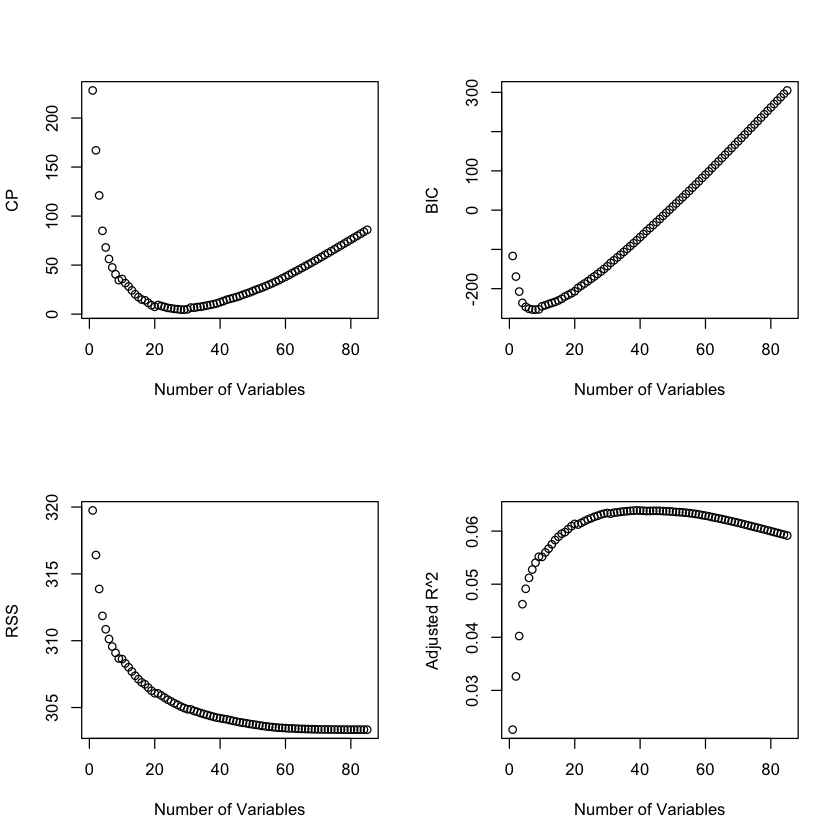

In [38]:
# plotting model selection measures of forward selection

par(mfrow = c(2,2))
plot(backward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(backward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(backward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(backward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Square

In [39]:
backward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*
10 ( 1 ),,,,,,,,,,*,⋯,*,,,,,,*,*,,*


In [40]:
#best 29 variable subset selected via backward selection using mallows CP

coef(regfit_backward, 29)

(Intercept)           V4           V6          V10          V17          V18 
 0.625880433  0.010557113 -0.004580412  0.004741649 -0.006885236 -0.013157430 
         V21          V22          V28          V30          V35          V36 
-0.007679696  0.003181598  0.003341660 -0.002542231 -0.068207079 -0.070234021 
         V41          V42          V44          V46          V47          V55 
-0.013613211  0.005720362  0.010337243 -0.016213475  0.010334083 -0.016787090 
         V57          V58          V59          V63          V76          V78 
 0.195199280  0.062671391  0.012829656 -0.049058878  0.039448241 -0.411354129 
         V79          V80          V82          V83          V84          V85 
-0.221856163 -0.021289726  0.284396711  0.036396646  0.110993314  0.073078894

In [41]:
predict.regsubsets = function(object, newdata, id)
{
    form  = as.formula(object$call[[2]])
    mat   = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

In [42]:
#To store forward train and test errors

fwd_train_errors <- matrix(rep(NA, 85))
fwd_test_errors  <- matrix(rep(NA, 85))

In [43]:
# calculating training and testing errors of all best p models selected via forward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit_forward, newdata = training_set, id = i)
    y_pred_test  = predict(regfit_forward, newdata = testing_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    fwd_train_errors[i] = mean(y_pred_train != training_set[, 86])
    fwd_test_errors[i]  = mean(y_pred_test  != testing_set[, 86])
}

In [44]:
#To store backward train and test errors

bwd_train_errors <- matrix(rep(NA, 85))
bwd_test_errors  <- matrix(rep(NA, 85))

In [45]:
# calculating training and testing errors of all best p models selected via backward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit_backward, newdata = training_set, id = i)
    y_pred_test  = predict(regfit_backward, newdata = testing_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    bwd_train_errors[i] = mean(y_pred_train != training_set[, 86])
    bwd_test_errors[i]  = mean(y_pred_test  != testing_set[, 86])
}

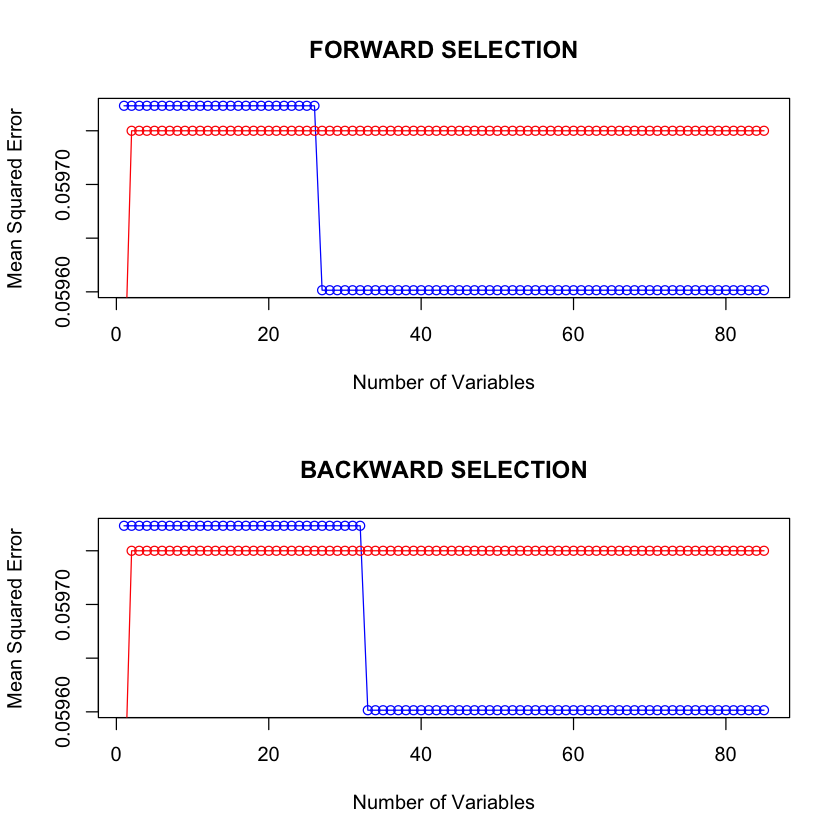

In [46]:
#plotting training and testing errors

par(mfrow = c(2, 1))

plot(fwd_train_errors, col = "blue", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "FORWARD SELECTION")
lines(fwd_test_errors, col = "red", type = "o")


plot(bwd_train_errors, col = "blue", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "BACKWARD SELECTION")
lines(bwd_test_errors, col = "red", type = "o")

In [55]:
#Ridge Regression

ridge_fit_insurance = cv.glmnet(as.matrix(x_training_set), y_training_set, alpha = 0)
ridge_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_training_set), y = y_training_set,      alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min   0.11    63 0.05353 0.002600      85
1se  32.60     2 0.05606 0.002606      85

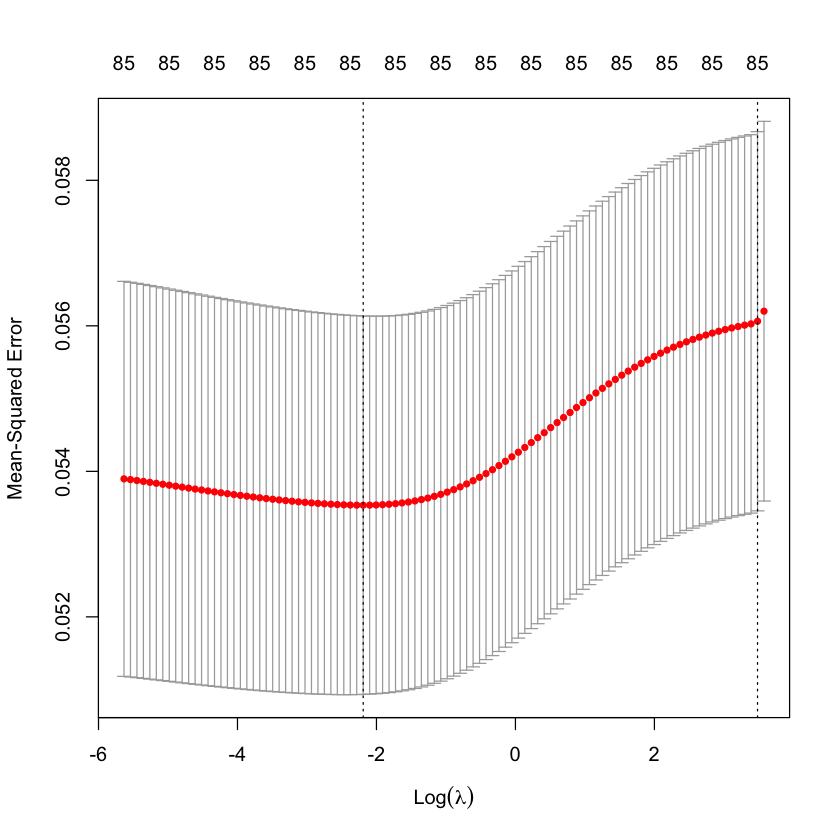

In [56]:
plot(ridge_fit_insurance)

In [57]:
#finding best lambda for ridge regression

best_lambda_ridge = ridge_fit_insurance$lambda.min
best_lambda_ridge

[1] 0.1118244

In [58]:
best_ridge_coeff <- predict(ridge_fit_insurance, s= best_lambda_ridge, type = "coefficients")
best_ridge_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -3.196340e-02
V1          -2.753259e-05
V2          -4.450321e-03
V3          -7.328045e-04
V4           5.023184e-03
V5          -4.683932e-04
V6          -2.470581e-03
V7           1.310684e-03
V8           1.728589e-03
V9          -1.206961e-03
V10          1.482973e-03
V11         -2.563685e-03
V12         -4.012080e-04
V13         -4.938140e-04
V14         -9.263812e-04
V15          5.712260e-04
V16          3.781320e-03
V17          5.792195e-04
V18         -2.309590e-03
V19          6.402587e-04
V20          3.246971e-04
V21         -5.099191e-03
V22          2.175742e-03
V23         -6.646076e-04
V24          1.771682e-04
V25          6.017910e-04
V26         -3.312903e-04
V27         -4.536061e-04
V28          8.300282e-04
V29         -1.179224e-03
V30         -9.252265e-04
V31          8.058020e-04
V32          1.949192e-03
V33          3.055772e-04
V34         -8.346179e-04
V35          4.542201e

In [59]:
#Predicting training samples using best lambda

train_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_training_set), type = 'response')
train_predict_ridge <- ifelse(train_predict_ridge > 0.5, 1, 0)

In [60]:
#Predicting testing samples using best lambda

test_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_testing_set), type = 'response')
test_predict_ridge <- ifelse(test_predict_ridge > 0.5, 1, 0)

In [61]:
table(train_predict_ridge, y_training_set)
table(test_predict_ridge, as.integer(unlist(y_testing_set)))

                   y_training_set
train_predict_ridge    0    1
                  0 5474  347
                  1    0    1

                  
test_predict_ridge    0    1
                 0 3762  237
                 1    0    1

In [62]:
#Training Error (MAE)

train_error_ridge <- mean(y_training_set != train_predict_ridge )
train_error_ridge

[1] 0.05960151

In [63]:
postResample(y_testing_set, test_predict_ridge)

RMSE    Rsquared         MAE 
0.243413229 0.003952669 0.059250000

In [64]:
postResample(y_training_set, train_predict_ridge)

RMSE    Rsquared         MAE 
0.244134208 0.002702265 0.059601512

In [65]:
#Lasso Regression
lasso_fit_insurance = cv.glmnet(as.matrix(x_training_set), y_training_set, alpha = 1)
lasso_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_training_set), y = y_training_set,      alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index Measure       SE Nonzero
min 0.003185    27 0.05357 0.002154      29
1se 0.027063     4 0.05568 0.002409       1

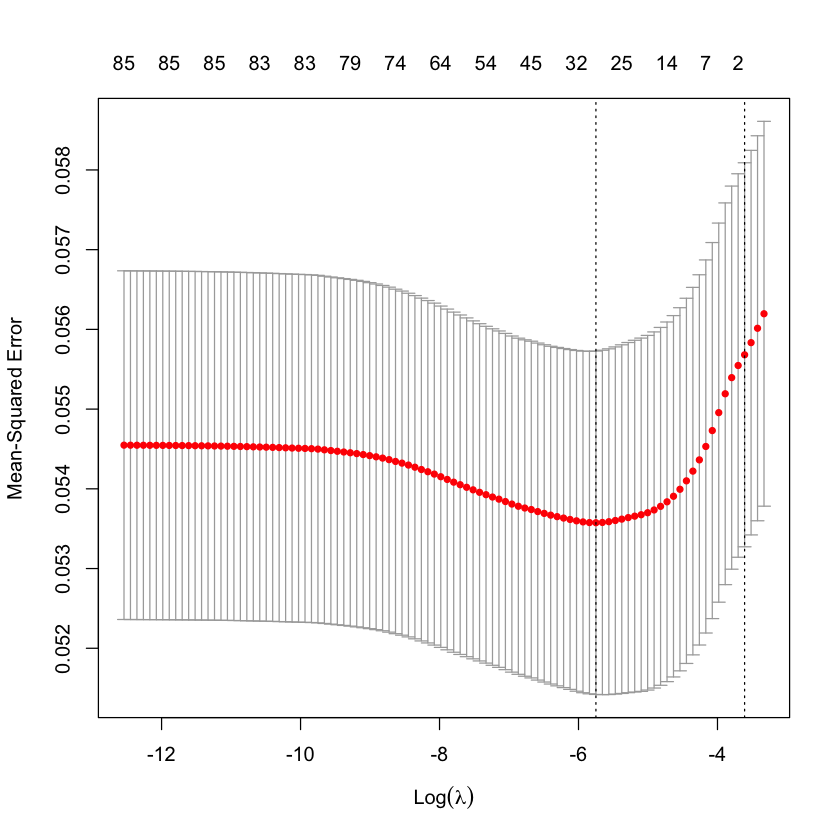

In [66]:
plot(lasso_fit_insurance)

In [67]:
best_lambda_lasso2= lasso_fit_insurance$lambda.min
best_lambda_lasso2

[1] 0.003184799

In [68]:
best_lasso_coeff <- predict(lasso_fit_insurance, s= best_lambda_lasso2, type = "coefficients")
best_lasso_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -0.0347380256
V1           .           
V2           .           
V3           .           
V4           0.0019717852
V5           .           
V6          -0.0003004838
V7           0.0010583648
V8           .           
V9          -0.0004851515
V10          0.0023624578
V11         -0.0011501645
V12          .           
V13          .           
V14          .           
V15          .           
V16          0.0036692332
V17          .           
V18         -0.0026950253
V19          .           
V20          .           
V21         -0.0053892547
V22          0.0012519363
V23          .           
V24          .           
V25          .           
V26          .           
V27          .           
V28          .           
V29          .           
V30         -0.0012125152
V31          .           
V32          0.0018945608
V33          .           
V34          .           
V35          .        

In [69]:
#predicting training samples

train_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_training_set), 
                               type = "response")
train_predict_lasso <- ifelse(train_predict_lasso > 0.5, 1, 0)

In [70]:
table(train_predict_lasso, y_training_set)
training_accuracy <- 5474 / 5820 # number of correct predictions / total predictions 
training_accuracy * 100

                   y_training_set
train_predict_lasso    0    1
                  0 5473  347
                  1    1    1

[1] 94.05498

In [71]:
#predicting testing samples

test_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_testing_set), 
                               type = "response")
test_predict_lasso <- ifelse(test_predict_lasso > 0.5, 1, 0)

In [72]:
table(test_predict_lasso, y_testing_set[, 1])
training_accuracy <- 3761 / 4000 # number of correct predictions / total predictions 
training_accuracy * 100

                  
test_predict_lasso    0    1
                 0 3760  237
                 1    2    1

[1] 94.025

In [73]:
# Training Error (MAE)

train_error_lasso <- mean(y_training_set != train_predict_lasso)
train_error_lasso

[1] 0.05977327

In [74]:
# Testing Error (MAE)

test_error_lasso <- mean(y_testing_set != test_predict_lasso)
test_error_lasso

[1] 0.05975

In [75]:
postResample(y_training_set, train_predict_lasso) # training
postResample(y_testing_set, test_predict_lasso) # testing

RMSE    Rsquared         MAE 
0.244485733 0.001185005 0.059773274

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

Lower the RMSE value, better the model is for prediction. 
From the above error estimates using OLS, Forward selection, Backward selection, Ridge and Lasso regression methods, we can determine that all the models are performing similar but using OLS estimates, Linear regressed performed slightly better with less RMSE and Rsquared values.
Hence, from all of the models Linear regression performed the best for our dataset.